In [1]:
#############
## IMPORTS ##
#############

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [2]:
#####################################
## READING RED AND WHITE WINE DATA ##
#####################################
redWineData = pd.read_csv("./data/winequality-red.csv")
whiteWineData = pd.read_csv("./data/winequality-white.csv")

In [11]:
######################################
## SUMMARY OF RED & WHITE WINE DATA ##
######################################
redSummary = redWineData.describe()
whiteSummary = whiteWineData.describe()

1599.0


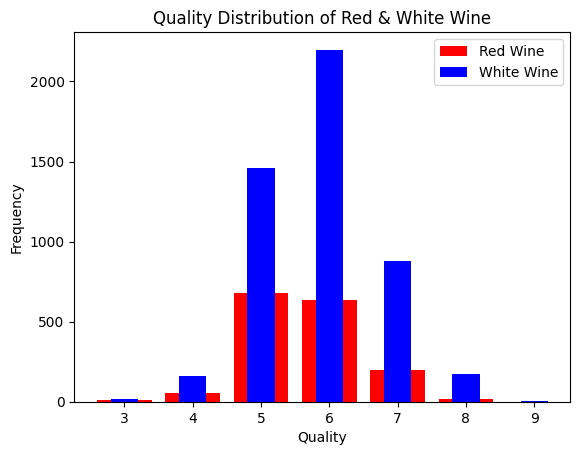

In [66]:
##################################################
## COMPARING THE QUALITY OF RED AND WHITE WINES ##
##################################################
# Getting the qulaity value for the red and the white wine.
redQuality = redWineData['quality']
whiteQuality = whiteWineData['quality']
# Getting the number of red wines with their respective qualities.
redQualityCount = pd.value_counts(redWineData['quality'])
redQualityNumbers = redQualityCount.keys().tolist()
redQualityFrequency = list(redQualityCount)
redQualityBar = plt.bar(redQualityNumbers, redQualityFrequency, color='red', label='Red Wine')
# Getting the number of white wines with their respective qualities.
whiteQualityCount = pd.value_counts(whiteWineData['quality'])
whiteQualityNumbers = whiteQualityCount.keys().tolist()
whiteQualityFrequency = list(whiteQualityCount)
whiteQualityBar = plt.bar(whiteQualityNumbers, whiteQualityFrequency, width=0.4, color='blue', label='White Wine')
# Making the plot.
plt.legend(loc='upper right')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality Distribution of Red & White Wine')
plt.savefig('./figures/Quality-Distribution.jpeg')
plt.show()




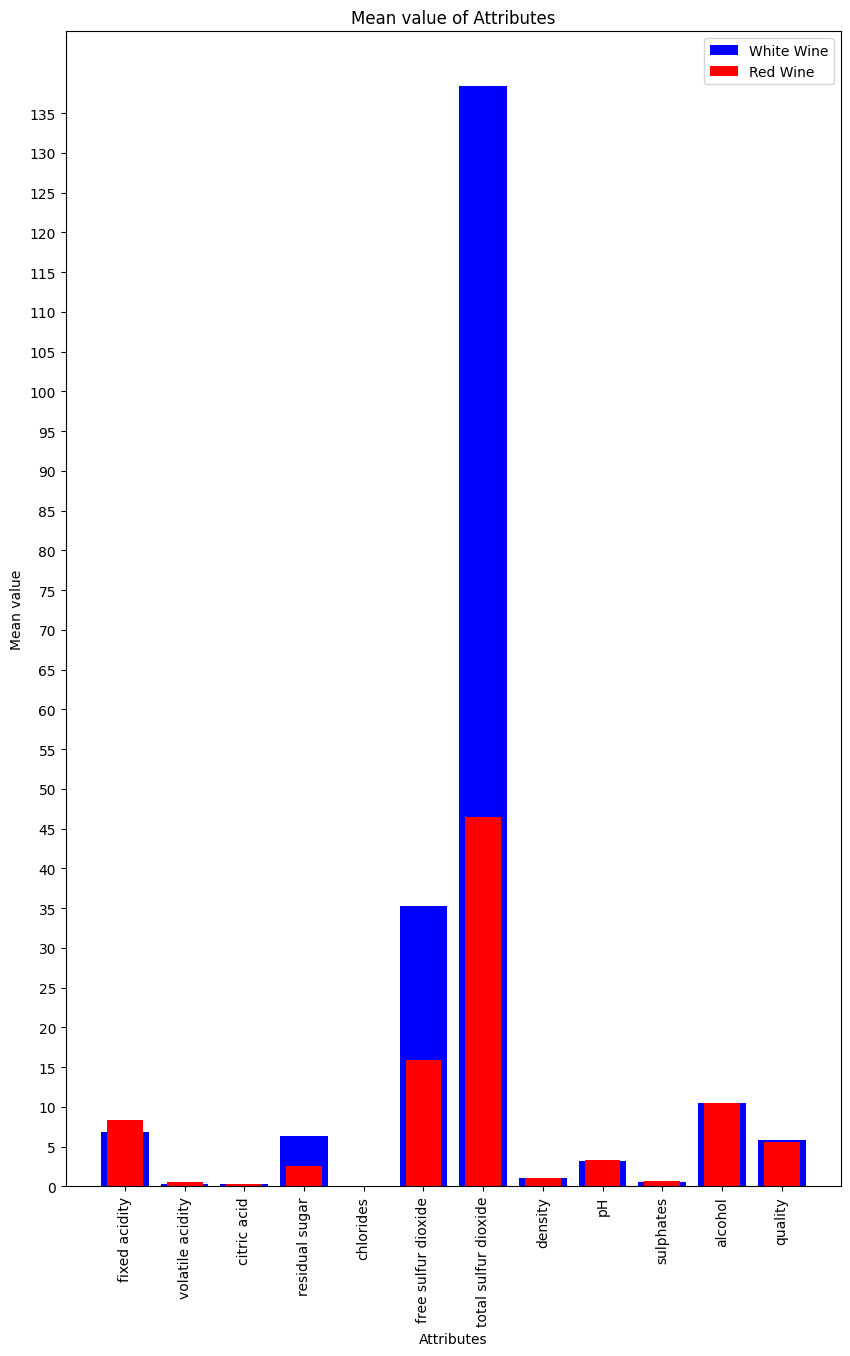

In [4]:
########################################################################################
## CREATING BAR CHARTS TO COMPARE THE MEANS OF ALL ATTRIUBUTES IN RED AND WHITE WINES ##
########################################################################################
# Creating a figure of a particular size.
plt.figure(figsize=(10,15))
# Adding the white win data to the bar chart.
whiteBar = plt.bar(whiteSummary.columns, whiteSummary.loc['mean'], label="White Wine", color="blue")
# Adding the red white data to the bar chart. 
redBar = plt.bar(redSummary.columns, redSummary.loc['mean'], label="Red Wine", color="red", width=0.6)
# Styling the bar chart.
redBar.set_label = 'Red Wine'
whiteBar.set_label = 'White Wine'
# Styling the graph
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,140,5))
plt.legend()
plt.xlabel("Attributes")
plt.ylabel("Mean value")
plt.title("Mean value of Attributes")
plt.savefig('./figures/Mean-Value-of-Attributes.jpeg')

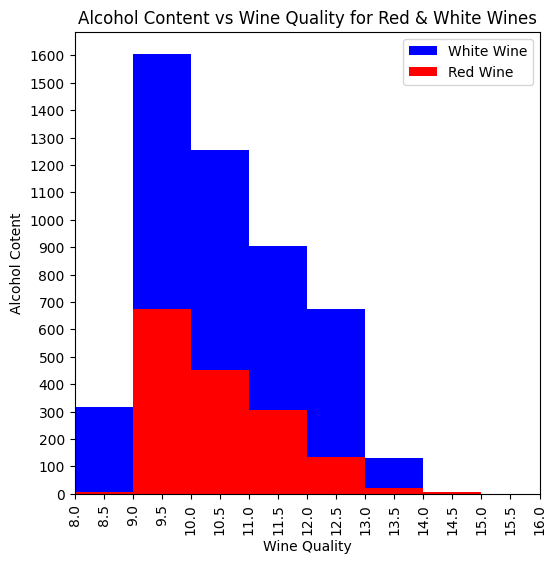

In [6]:
###############################################################
## COMPARING THE ALCOHOL CONTENT AND THE QUALITY OF THE WINE ##
###############################################################
plt.figure(figsize=(6,6))
redQuality = redWineData['quality']
whiteQuality = whiteWineData['quality']
redAlcohol = redWineData['alcohol']
whiteAlcohol = whiteWineData['alcohol']
blueHist = plt.hist(whiteWineData['alcohol'], bins=range(8, 16), color='blue', label='White Wine')
redHist = plt.hist(redWineData['alcohol'], bins=range(8, 16), color='red', label='Red Wine')
plt.xlim(8, 14)
plt.xticks(np.arange(8, 16.5, 0.5), rotation=90)
plt.yticks(np.arange(0, 1700, 100))
plt.legend(loc='upper right')
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol Cotent")
plt.title("Alcohol Content vs Wine Quality for Red & White Wines")
plt.savefig('./figures/Alcohol-content-vs-Quality.jpeg')

In [63]:
##########################################################################
## SPLITTING DATA INTO TRAINING DATA, VALIDATION DATA & PREDICTION DATA ##
##########################################################################
trainingData = 2/3
validationData = 1/6
predictionData = 1/6

redDimension = redWineData.shape
whiteDimension = whiteWineData.shape

redTrainingRows = redDimension[0] * trainingData
redValidationRows = redTrainingRows + (redDimension[0] * validationData)

whiteTrainingRows = whiteDimension[0] * trainingData
whiteValidationRows = whiteTrainingRows + (whiteDimension[0] * validationData)

redTrainingData = redWineData.loc[0:redTrainingRows]
redQualityTrainingData = redTrainingData['quality']
redTrainingData = redTrainingData.drop('quality', axis=1)

redValidationData = redWineData.loc[redTrainingRows+1:redValidationRows]
redQualityValidationData = redValidationData['quality']
redValidationData = redValidationData.drop('quality', axis=1)

redTestData = redWineData.loc[redValidationRows+1:]
redQualityPredictionData = redTestData['quality']
redTestData = redTestData.drop('quality', axis=1)

whiteTrainingData = whiteWineData.loc[0:whiteTrainingRows]
whiteQualityTrainingData = whiteTrainingData['quality']
whiteTrainingData = whiteTrainingData.drop('quality', axis=1)

whiteValidationData = whiteWineData.loc[whiteTrainingRows+1:whiteValidationRows]
whiteQualityValidationData = whiteValidationData['quality']
whiteValidationData = whiteValidationData.drop('quality', axis=1)

whiteTestData = whiteWineData.loc[whiteValidationRows+1:]
whiteQualityPredictionData = whiteTestData['quality']
whiteTestData = whiteTestData.drop('quality', axis=1)

In [64]:
##############################
## STANDARDIZING THE X DATA ##
##############################
sc = StandardScaler()
redTrainingDataScaled = sc.fit_transform(redTrainingData)
redValidationDataScaled = sc.fit_transform(redValidationData)
redTestDataScaled = sc.fit_transform(redTestData)
whiteTrainingDataScaled = sc.fit_transform(whiteTrainingData)
whiteValidationDataScaled = sc.fit_transform(whiteValidationData)
whiteTestDataScaled = sc.fit_transform(whiteTestData)

In [66]:
############################
## NORMALIZING THE X DATA ##
############################
a = preprocessing.normalize(redTrainingDataScaled, axis=0)
b = preprocessing.normalize(redValidationDataScaled, axis=0)
c = preprocessing.normalize(redTestDataScaled, axis=0)
d = preprocessing.normalize(whiteTrainingData, axis=0)
e = preprocessing.normalize(whiteValidationDataScaled, axis=0)
f = preprocessing.normalize(whiteTestDataScaled, axis=0)
redTrainingDataNormalized = pd.DataFrame(a, columns = redTrainingData.columns)
redValidationDataNormalized = pd.DataFrame(b, columns = redValidationData.columns)
redTestDataNormalized = pd.DataFrame(c, columns = redTestData.columns)
whiteTrainingDataNormalized = pd.DataFrame(d, columns = whiteTrainingData.columns)
whiteValidationDataNormalized = pd.DataFrame(e, columns = whiteValidationData.columns)
whiteTestDataNormalized = pd.DataFrame(f, columns = whiteTestData.columns)

In [ ]:
###############################################
## PRINCIPAL COMPONENT ANALYSIS FOR RED WINE ##
###############################################
pca = PCA(0.95)
redTrainingDataPCA = pca.fit_transform(redTrainingDataNormalized)
redValidationDataPCA = pca.fit_transform(redValidationDataNormalized)
redTestDataPCA = pca.fit_transform(redTestDataNormalized)
whiteTrainingDataPCA = pca.fit_transform(whiteTrainingDataNormalized)
whiteValidationDataPCA = pca.fit_transform(whiteValidationDataNormalized)
whiteTestDataPCA = pca.fit_transform(whiteTestDataNormalized)
